# WORD2VEC TUTORIAL

## 1. Install and import gensim

By default, **gensim already installed in the Colab**. In case that your computer does not have the library, we can install by one of the following ways:

```
pip install gensim
```

or 

```
conda install -c anaconda gensim
```

To import the library, use the following line of codes:

In [ ]:
import gensim

## 2. Download the pretrained model

Word2vec embedding is trained on huge amount of data (billions of text) with many GPUs and may take a couple of weeks to finish. Therefore, using a pretained model is a more feasible solution of many people.

To download the pretrained model, please use `wget` with the following url. For more information, please refer to https://fasttext.cc

It may takes 1 minute to download and unzip the model.

In [ ]:
# Download pretrained model
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-english/wiki-news-300d-1M.vec.zip

# Unzip the model
!unzip wiki-news-300d-1M.vec.zip

Then, load the model using `gensim` lib. It may takes 3-4 minutes.

In [ ]:
model = gensim.models.KeyedVectors.load_word2vec_format('wiki-news-300d-1M.vec', binary=False)

## 3. Feature vector

See list token

In [ ]:
##################
# See all vocab of model
# CODE HERE
pass
#
##################

Let's try the very first step: trying to represent a token by a feature vector.

For example, we use the following syntax to map the word `'king'` to a 300-dimensonal vector:

In [ ]:
##################
# Try map the word 'king' to vector
# CODE HERE
pass
#
##################

Then, we print out the values of the representation vector of `'king'`:

In [ ]:
##################
# Try map the word 'king' to vector
# CODE HERE
pass
#
##################

In [ ]:
##################
# Try map vietnamese word ???
# CODE HERE

#
##################

I'm sure that, you will dont understand the meaning of this vector. Me too. But, we can use that feature vector compute the similarity with other words.

**Note:** We can compare two feature vector by using `cosine similarity` and `euclidean distance`

The `cosine similarity function` is:

$\cos (\theta)=\frac{\mathbf{A} \cdot \mathbf{B}}{\|\mathbf{A}\|\|\mathbf{B}\|}=\frac{\sum_{i=1}^{n} A_{i} B_{i}}{\sqrt{\sum_{i=1}^{n} A_{i}^{2}} \sqrt{\sum_{i=1}^{n} B_{i}^{2}}}$

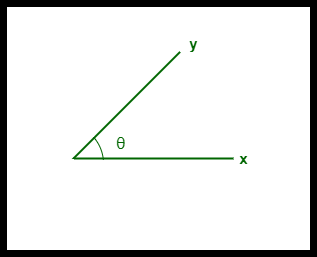

In [ ]:
import numpy as np

def cosine_similarity(A, B):
    '''
    Input:
        A: a numpy array which corresponds to a word vector
        B: a numpy array which corresponds to a word vector
    Output:
        cos: numerical number representing the cosine similarity between A and B.
    '''
    dot = np.dot(A, B)
    norma = np.sqrt(np.dot(A, A))
    normb = np.sqrt(np.dot(B, B))
    cos = dot / (norma * normb)

    return cos

The `euclidean distance` is defined as:

$\begin{aligned} d(\mathbf{A}, \mathbf{B})=d(\mathbf{B}, \mathbf{A}) &=\sqrt{\left(A_{1}-B_{1}\right)^{2}+\left(A_{2}-B_{2}\right)^{2}+\cdots+\left(A_{n}-B_{n}\right)^{2}} = \sqrt{\sum_{i=1}^{n}\left(A_{i}-B_{i}\right)^{2}} \end{aligned}$

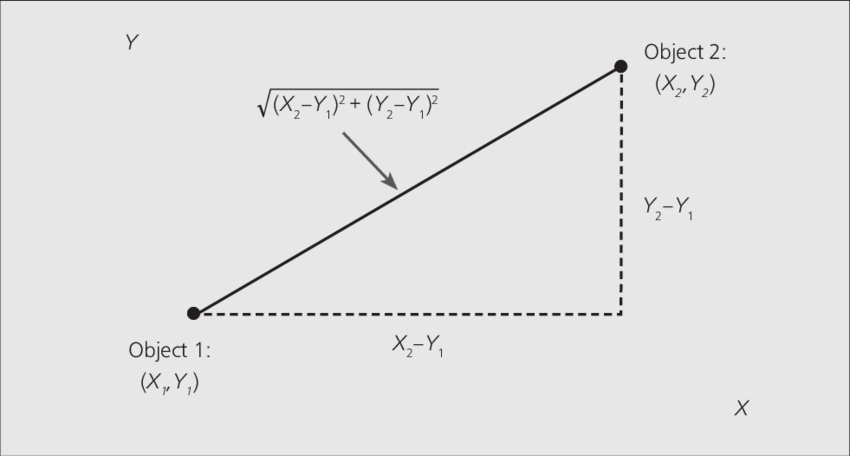

In [ ]:
def euclidean(A, B):
    '''
    Input:
        A: a numpy array which corresponds to a word vector
        B: a numpy array which corresponds to a word vector
    Output:
        d: numerical number representing the Euclidean distance between A and B.
    '''
    return np.linalg.norm(A - B)

So we try with some words

In [ ]:
red_feature_vector = model['red']
yellow_feature_vector = model['yellow']
you_feature_vector = model['you']

In [ ]:
##################
# similarity distance
# CODE HERE
pass
#
##################

In [ ]:
##################
# euclidean distance
# CODE HERE
pass
#
##################

We guess that, maybe if word A and B have similar meaning, there representation vectors are more similar. So we try with `'like'`, `'love'` and `'hate'`:

In [ ]:
love_feature_vector = model['love']
like_feature_vector = model['like']
hate_feature_vector = model['hate']

print('similarity of love and like:', cosine_similarity(love_feature_vector, like_feature_vector))
print('similarity of love and hate:', cosine_similarity(love_feature_vector, hate_feature_vector))

Why `'love'` and `'hate'` are more similar. In fact, `'love'` and `'hate'` have different grammatical roles in sentences in English while `'love'` and `'like'` are pretty different. We can you Google Translate to see the differences.

## 4. Linguistic regularities

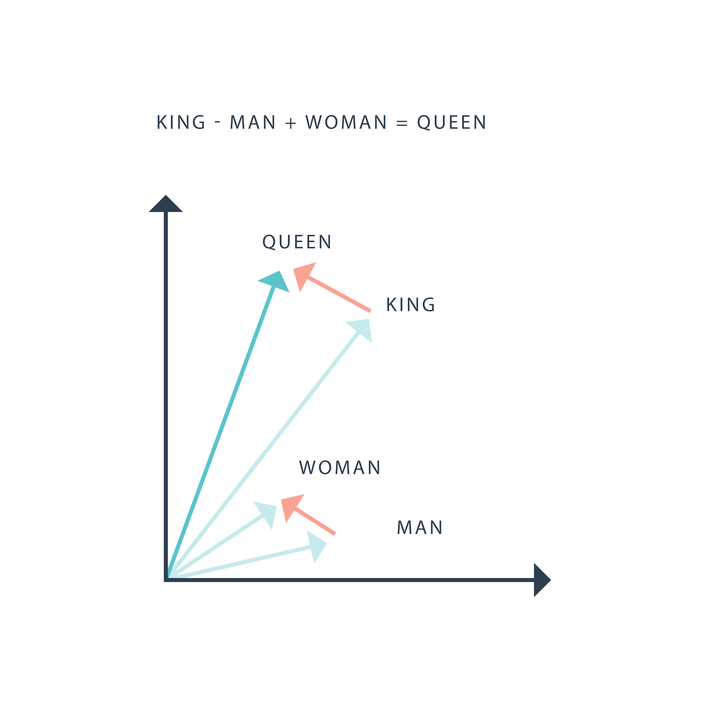


In [ ]:
# to find most similar word we can use model.most_similar function
model.most_similar(positive=['red'])

In [ ]:
# king - man + woman = ???
print(model.most_similar(positive=['woman', 'king'], negative=['man']))

It was recently shown that the word vectors capture many linguistic regularities, for example vector operations `model['king'] - model['man'] + model['woman'] is close to model['queen']`.


We can also ask the model to answer the following question: If `'king'` is a `'man'` then `'queen'` is ...?

In [ ]:
# king - man = queen - ???
print(model.most_similar(positive=['queen', 'man'], negative=['king'], topn=1))

Let's try with the different relations:

- Capital - Country

In [ ]:
##################
# vector distance between country and capital: 'Paris', 'Hanoi', 'Berlin', 'Beijing', ...
# CODE HERE

#
##################

- Noun - Plural form

In [ ]:
##################
# vector distance between poun and plural form: 'book', 'box', 'child', 'man', ...
# CODE HERE

#
##################

- Verb V1 - V3 form

In [ ]:
##################
# vector distance between V1 - V3 form: 'do', 'go', 'have', ...
# CODE HERE

#
##################

## 5. Plotting the vectors using PCA

As we saw, we are working in a 300-dimensional space in this case. Although from a computational perspective we were able to perform a good job, it is impossible to visualize results in such high dimensional spaces.

You can think of PCA as a method that projects our vectors in a space of reduced dimension, while keeping the maximum information about the original vectors in their reduced counterparts.

In [ ]:
from sklearn.decomposition import PCA

words = ['oil', 'gas', 'happy', 'sad', 'city', 'town', 'village', 'country', 'continent', 'petroleum', 'joyful']
embeddings = np.array([model[word] for word in words])

# project the 300-dimensional to two-dimensional
pca = PCA(n_components=2)
embeddings_two_dim = pca.fit_transform(embeddings)

print('Old shape:', embeddings.shape)
print('New shape:', embeddings_two_dim.shape)

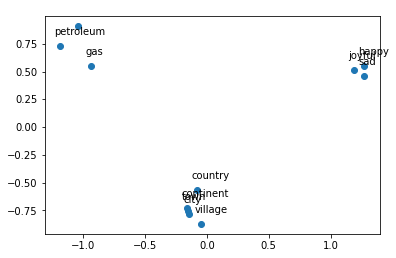

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(embeddings_two_dim[:, 0], embeddings_two_dim[:, 1])
for i, word in enumerate(words):
    plt.annotate(word, xy=(embeddings_two_dim[i, 0] - 0.05, embeddings_two_dim[i, 1] + 0.1))

plt.show()

You will see that when you map out the words, similar words will be clustered next to each other. For example, the words 'sad', 'happy', 'joyful' all describe emotion and are supposed to be near each other when plotted. The words: 'oil', 'gas', and 'petroleum' all describe natural resources. Words like 'city', 'village', 'town' could be seen as synonyms and describe a similar thing.